In [2]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().parent.parent))
from tensor_hero.preprocessing.audio import ninos, onset_select
from tensor_hero.preprocessing.chart import chart2tensor
from tensor_hero.preprocessing.data import __remove_release_keys, __remove_modifiers
from tensor_hero.visualization import plot_chart
import librosa
from mir_eval.onset import f_measure
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pickle
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

def onset_frames_to_time(onsets, sr, hop_len):
    time_per_frame = hop_len/sr
    return [x*time_per_frame for x in onsets]

def onset_times_to_bins(onset_times):
    onset_times = [round(x*100) for x in onset_times]
    return onset_times

def compare_onsets(audio, sr, notes_array, start, end,
                   w1=3, w2=3, w3=7, w4=1, w5=0, delta=0,
                   plot= False):
    
    # Measure onsets using spectral sparsity
    odf, _, hop_len = ninos(audio[sr*start:sr*end], sr)
    onsets = onset_select(odf, w1, w2, w3, w4, w5, delta, plot=False)
    onset_times = onset_frames_to_time(onsets, sr, hop_len)
    onset_time_bins = onset_times_to_bins(onset_times)

    # Get ground truth clone hero onsets
    ch_onsets = np.where(notes_array[start*100:end*100] > 0)[0]
    ch_onset_times = [x/100 for x in ch_onsets]
    
    # Compare with f_measure
    f1, _, _ = f_measure(np.array(ch_onset_times), np.array(onset_times))
    
    # plot
    if plot:
        plt.figure(figsize=(15,5))
        for o in ch_onsets:
            plt.axvline(x=o, ymin=0, ymax=0.5, color='r')
        for o in onset_time_bins:
            plt.axvline(x=o, ymin=0.5, ymax=1, color='g')
    
    return f1

# Get a few 10 second song segments to try out (10 seconds defined below)
anberlin_path = Path.cwd().parent.parent / 'Training_Data' / 'fully_curated' / 'full_curated' \
    / 'Anberlin - The Feel Good Drag'
notes_array_anberlin = chart2tensor(anberlin_path / 'notes.chart')
notes_array_anberlin = __remove_modifiers(__remove_release_keys(notes_array_anberlin))
anberlin, sr_anberlin = librosa.load(str(anberlin_path / 'other.wav'))

infected_path = Path.cwd().parent.parent / 'Training_Data' / 'fully_curated' / 'full_curated' \
    / 'Bad Religion - Infected'
notes_array_infected = chart2tensor(infected_path / 'notes.chart')
notes_array_infected = __remove_modifiers(__remove_release_keys(notes_array_infected))
infected, sr_infected = librosa.load(str(infected_path / 'other.wav'))

number_path = Path.cwd().parent.parent / 'Training_Data' / 'fully_curated' / 'full_curated' \
    / 'Ben Harper and Relentless7 - Number with No Name'
notes_array_number = chart2tensor(number_path / 'notes.chart')
notes_array_number = __remove_modifiers(__remove_release_keys(notes_array_number))
number, sr_number = librosa.load(str(number_path / 'other.wav'))

soothsayer_path = Path.cwd().parent.parent / 'Training_Data' / 'fully_curated' / 'full_curated' \
    / 'Buckethead - Soothsayer (xX760Xx)'
notes_array_soothsayer = chart2tensor(soothsayer_path / 'notes.chart')
notes_array_soothsayer = __remove_modifiers(__remove_release_keys(notes_array_soothsayer))
soothsayer, sr_soothsayer = librosa.load(str(soothsayer_path / 'other.wav'))

misirlou_path = Path.cwd().parent.parent / 'Training_Data' / 'fully_curated' / 'full_curated' \
    / 'Dick Dale - Misirlou'
notes_array_misirlou = chart2tensor(misirlou_path / 'notes.chart')
notes_array_misirlou = __remove_modifiers(__remove_release_keys(notes_array_misirlou))
misirlou, sr_misirlou = librosa.load(str(misirlou_path / 'other.wav'))

littlewing_path = Path.cwd().parent.parent / 'Training_Data' / 'fully_curated' / 'full_curated' \
    / 'Jimi Hendrix - Little Wing'
notes_array_littlewing = chart2tensor(littlewing_path / 'notes.chart')
notes_array_littlewing = __remove_modifiers(__remove_release_keys(notes_array_littlewing))
littlewing, sr_littlewing = librosa.load(str(littlewing_path / 'other.wav'))


names = ['anberlin', 'infected', 'number', 'soothsayer','misirlou', 'littlewing', 'mean']

In [3]:

h = {}
for name in names:
    with open('best_hyperparams_' + name + '.pkl', 'rb') as f:
        h[name] = pickle.load(f)

for name, best_params in h.items():
    print(f'\n{name}\n{best_params}')
# best_hyperparams_mean = {
    # 'w1' : 0,
    # 'w2' : 0,
    # 'w3' : 0,
    # 'w4' : 0,
    # 'w5' : 0,
    # 'delta' : 0
# }


anberlin
{'w1': 10, 'w2': 7, 'w3': 6, 'w4': 10, 'w5': 0, 'delta': 1.2000000000000002, 'best_f1': 0.835820895522388}

infected
{'w1': 4, 'w2': 10, 'w3': 1, 'w4': 5, 'w5': 0, 'delta': 1.2000000000000002, 'best_f1': 0.6285714285714286}

number
{'w1': 4, 'w2': 6, 'w3': 4, 'w4': 2, 'w5': 0, 'delta': 0.2, 'best_f1': 0.6041666666666666}

soothsayer
{'w1': 7, 'w2': 6, 'w3': 9, 'w4': 5, 'w5': 0, 'delta': 1.8, 'best_f1': 0.8597285067873304}

misirlou
{'w1': 3, 'w2': 7, 'w3': 8, 'w4': 8, 'w5': 0, 'delta': 1.0, 'best_f1': 0.869158878504673}

littlewing
{'w1': 10, 'w2': 9, 'w3': 1, 'w4': 1, 'w5': 0, 'delta': 0.0, 'best_f1': 0.6382978723404255}

mean
{'w1': 10, 'w2': 9, 'w3': 4, 'w4': 2, 'w5': 0, 'delta': 0.2, 'best_f1': 0.6751567656514306}


Green lines are predicted
Red lines are ground truth


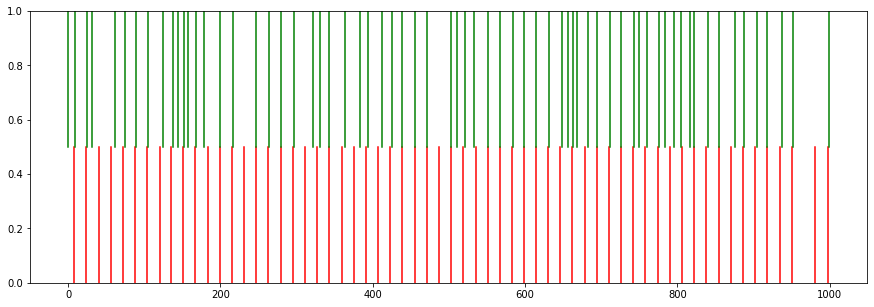

In [7]:
f1_anberlin = compare_onsets(anberlin, sr_anberlin, notes_array_anberlin, 10, 20,
                             w1=h['anberlin']['w1'], w2=h['anberlin']['w1'], 
                             w3=h['anberlin']['w3'], w4=h['anberlin']['w4'], w5=0, 
                             delta=h['anberlin']['delta'], plot=True)
print('Green lines are predicted\nRed lines are ground truth')

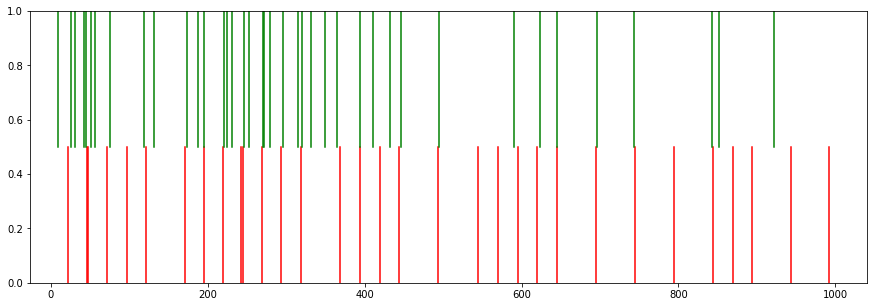

In [8]:
f1_infected = compare_onsets(infected, sr_infected, notes_array_infected, 60, 70,
                             w1=h['infected']['w1'], w2=h['infected']['w1'], 
                             w3=h['infected']['w3'], w4=h['infected']['w4'], w5=0, 
                             delta=h['infected']['delta'], plot=True)

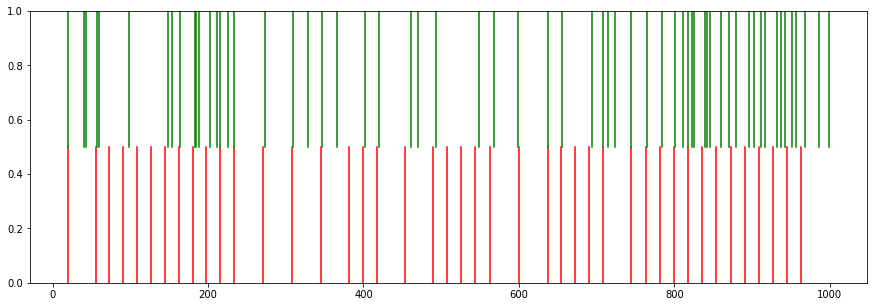

In [17]:
f1_number = compare_onsets(number, sr_number, notes_array_number, 100, 110,
                             w1=h['number']['w1'], w2=h['number']['w1'], 
                             w3=h['number']['w3'], w4=h['number']['w4'], w5=0, 
                             delta=h['number']['delta'], plot=True)

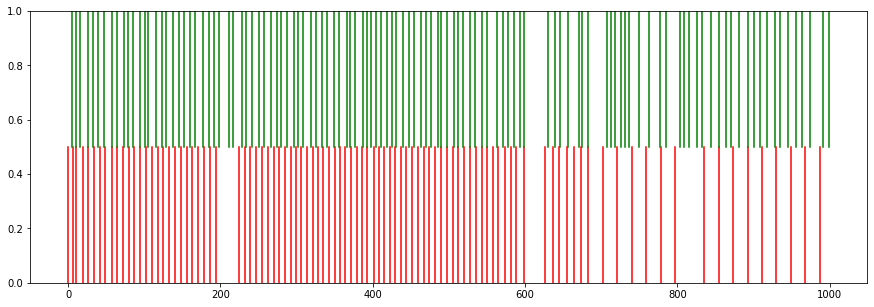

In [18]:
f1_soothsayer = compare_onsets(soothsayer, sr_soothsayer, notes_array_soothsayer, 280, 290,
                             w1=h['soothsayer']['w1'], w2=h['soothsayer']['w1'], 
                             w3=h['soothsayer']['w3'], w4=h['soothsayer']['w4'], w5=0, 
                             delta=h['soothsayer']['delta'], plot=True)

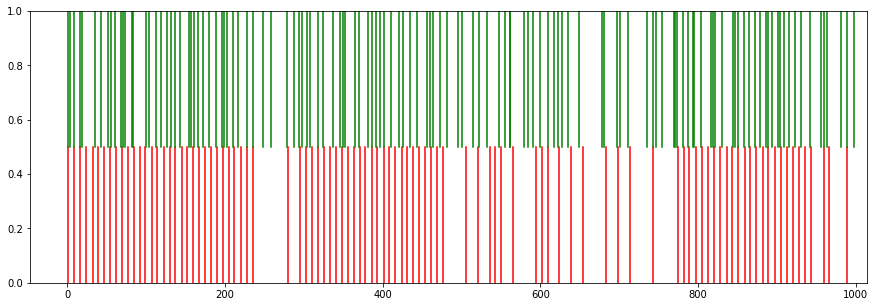

In [19]:
f1_misirlou = compare_onsets(misirlou, sr_misirlou, notes_array_misirlou, 70, 80,
                             w1=h['misirlou']['w1'], w2=h['misirlou']['w1'], 
                             w3=h['misirlou']['w3'], w4=h['misirlou']['w4'], w5=0, 
                             delta=h['misirlou']['delta'], plot=True)

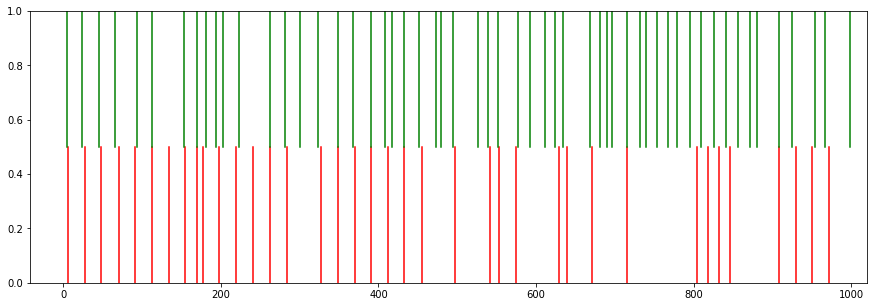

In [9]:
f1_littlewing = compare_onsets(littlewing, sr_littlewing, notes_array_littlewing, 90, 100,
                             w1=h['littlewing']['w1'], w2=h['littlewing']['w1'], 
                             w3=h['littlewing']['w3'], w4=h['littlewing']['w4'], w5=0, 
                             delta=h['littlewing']['delta'], plot=True)